# Task 4.1+ Supervised Learning - Regression
### Modul 12: Application of Machine Learning in Health Care
**Author:** Markus Schwaiger

**Date:** May 3, 2024

---

- Load dataset heartdata.csv
- Check assumptions of a linear regression model (use R functions cor.test and hist and plot), see also Linear Regression in R | An Easy Step-by-Step Guide (scribbr.com)
- Fit a linear regression model (use R function lm)
- Evaluate the model (R function summary and plot)
- Train the model using R function train of package caret
- Update your git-repository

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

## Load dataset heartdata.csv

In [2]:
data = pd.read_csv("../data/heartdata.csv", index_col=0)
print(data.head())
print("Data dimensions:", data.shape)
print("Missing values:", data.isnull().sum().sum())

      biking    smoking  heartdisease
1  30.801246  10.896608     11.769423
2  65.129215   2.219563      2.854081
3   1.959665  17.588331     17.177803
4  44.800196   2.802559      6.816647
5  69.428454  15.974505      4.062224
Data dimensions: (498, 3)
Missing values: 0


## Check assumptions of a linear regression model

### Correlation between biking and smoking

In [3]:
correlation, p_value = pearsonr(data["biking"], data["smoking"])
print("Correlation between biking and smoking:", correlation * 100, "%")

Correlation between biking and smoking: 1.5136184529564876 %


### Normality of the dependent variable (heartdisease)

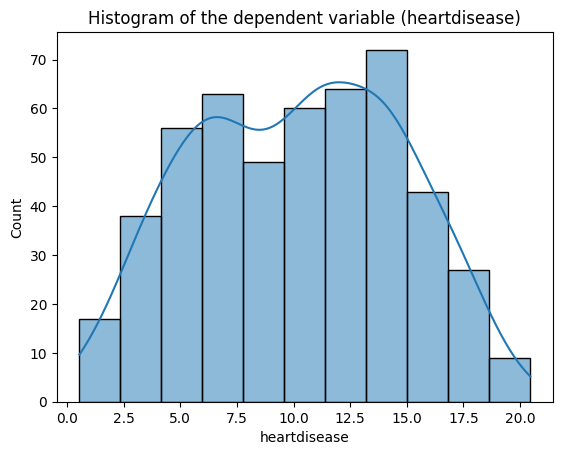

In [4]:
sns.histplot(data["heartdisease"], kde=True)
plt.title("Histogram of the dependent variable (heartdisease)")
plt.show()

### Linearity

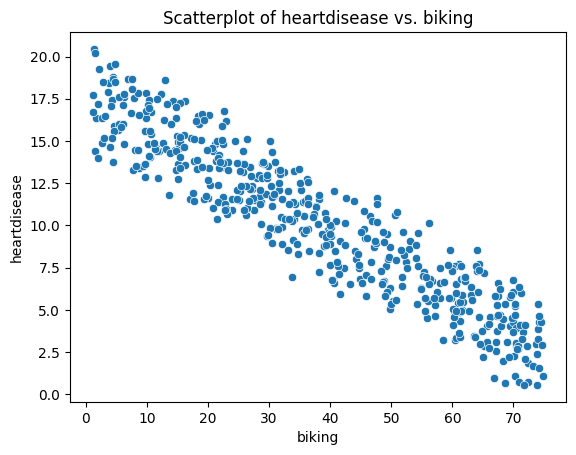

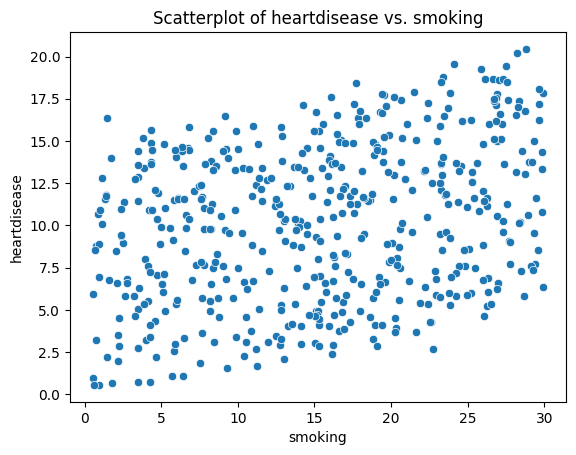

In [5]:
sns.scatterplot(x="biking", y="heartdisease", data=data)
plt.title("Scatterplot of heartdisease vs. biking")
plt.show()

sns.scatterplot(x="smoking", y="heartdisease", data=data)
plt.title("Scatterplot of heartdisease vs. smoking")
plt.show()

##  Fit a linear regression model

In [6]:
X = data[["biking", "smoking"]]
y = data["heartdisease"]
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))
r_squared = model.score(X, y)
print("R-square value:", r_squared)
y_pred = model.predict(X)

Intercept: 14.984657987225848
Coefficients: {'biking': -0.20013305195862297, 'smoking': 0.17833391383818575}
R-square value: 0.9796174523377278


## Train the model
- I struggled to migrate from R to Python, even with help from ChatGPT.

In [7]:
np.random.seed(123)
scaler = StandardScaler()
# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
# Define KFold for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=123)
# Define a scoring function for RMSE
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(((y_pred - y_true) ** 2).mean())
)
# Cross-validation to get RMSE, R-squared, and MAE
rmse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=rmse_scorer)
r_squared_scores = cross_val_score(pipeline, X, y, cv=kf, scoring="r2")
mae_scores = cross_val_score(pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error")
# Output the results
print("10-fold Cross-Validation Results:")
print("Mean RMSE:", np.mean(rmse_scores))
print("Mean R-squared:", np.mean(r_squared_scores))
print("Mean MAE:", -np.mean(mae_scores))  # Convert back to positive for interpretation

# Train the final pipeline on the full dataset
pipeline.fit(X, y)
print("Trained model:", pipeline["model"])




10-fold Cross-Validation Results:
Mean RMSE: 0.6539498951568911
Mean R-squared: 0.9786225770547892
Mean MAE: 0.5189197929517632
Trained model: LinearRegression()
